In [1]:
import cv2
import torch
import torch.nn as nn

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('face.jpg', 0)

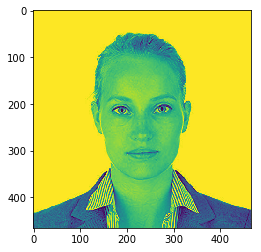

In [7]:
plt.imshow(img)

In [8]:
img.shape

(466, 466)

In [82]:
class Siamese(nn.Module):
    def __init__(self):
        super(Siamese,self).__init__()
        self.conv1 = nn.Conv2d(1,3,10)
        self.conv2 = nn.Conv2d(3,1,10)
        self.linear = nn.Linear(200704, 10)
    
    def forward(self, img):
        c1 = self.conv1(img)
        c2 = self.conv2(c1)
        c2 = c2.view(1,1,-1)
        l = self.linear(c2).view(-1,)
        return l

In [83]:
image = torch.from_numpy(img).float().view(1,1,466,466)

In [84]:
model = Siamese()

In [85]:
pred = model(image)

In [86]:
pred.shape

torch.Size([10])

In [87]:
pred

tensor([ 1.0833e+00,  1.9737e+00,  4.9189e+00, -2.9446e+00, -2.5862e-03,
        -1.3675e+00,  5.2204e+00, -2.8674e+00,  1.6996e+00,  1.1284e+01],
       grad_fn=<ViewBackward>)

In [88]:
true = torch.rand(10)

In [89]:
true

tensor([0.1664, 0.9003, 0.0436, 0.2224, 0.5933, 0.4227, 0.2575, 0.5743, 0.2707,
        0.1614])

In [91]:
optim = torch.optim.Adam(model.parameters(), 0.001)

In [93]:
for itr in range(100):
    optim.zero_grad()
    pred = model(image)
    loss = torch.sum((pred - true) ** 2)
    loss.backward()
    optim.step()

KeyboardInterrupt: 